<img src="./img/uomlogo.png" align="left"/><br><br>
# PHYS20762 - Example of Fitting Methods in Python

Hywel Owen  
(c) University of Manchester  
24th February 2020

![](./img/bee.png)
## Linear Fits Using Different Python Packages

As usual, we first initialise our Python interpreter

In [1]:
# Initialisation
import string
from math import *
import numpy as np
import matplotlib.pyplot as plt
import random

plt.rcParams.update({'font.size': 14})
plt.style.use('default')

We define some $x$ and $y$ values to use for our fitting. Here, we use 10 data points using a gradient $m$ and an intercept $c$. There are no errors, so our linear fit should be very good.

In [2]:
# x values
x = np.array([1., 2, 3, 4, 5, 6, 7, 8, 9, 10])
# Gradient m
m = 3.5
# Intercept c
c = 1.2
# y values generated from x values
y = m*x + c
# Check the y values have been generated correctly
print(y)

[ 4.7  8.2 11.7 15.2 18.7 22.2 25.7 29.2 32.7 36.2]


Whatever linear fit we do, we are expecting to get $m=5$ and $c=1.2$. First, we try using **np.polyfit**. We use the simplest available syntax for polyfit which just gives us the fitting parameters:

In [4]:
# Perform a linear fit
fit_parameters = np.polyfit(x,y,1)
fit_m = fit_parameters[0]
fit_c = fit_parameters[1]
print('Linear np.polyfit of y = m*x + c')
print('Gradient  m = {:04.2f}'.format(fit_m))
print('Intercept c = {:04.2f}'.format(fit_c))

Linear np.polyfit of y = m*x + c
Gradient  m = 3.50
Intercept c = 1.20


It's interesting straight away to ask ourselves what the fit parameters would be if we used a higher-order fit. Let's try a second-order fit, assuming the data might be of the form $y = a x^2 + b x + c$:

In [5]:
# Perform a quadratic fit on linear data
fit_parameters = np.polyfit(x,y,2)
fit_a = fit_parameters[0]
fit_b = fit_parameters[1]
fit_c = fit_parameters[2]
print('Quadratic np.polyfit of y = a*x**2 + b*c + c')
print('Quadratic term  a = {:04.2f}'.format(fit_a))
print('Linear term     b = {:04.2f}'.format(fit_b))
print('Intercept       c = {:04.2f}'.format(fit_c))

Quadratic np.polyfit of y = a*x**2 + b*c + c
Quadratic term  a = 0.00
Linear term     b = 3.50
Intercept       c = 1.20


As expected, the quadratic term is zero.

Next, let's try to get the errors on this 'perfect' (zero error) set of x and y values. We use the additional option **cov** in **np.polyfit**. The diagonal elements of the second returned item (**fit_errors**) are the variances of the $m$ and $c$ values.

In [26]:
# Perform a linear fit and get the errors
fit_parameters, fit_errors = np.polyfit(x,y,1,cov=True)
fit_m = fit_parameters[0]
fit_c = fit_parameters[1]
# Here, we (rather laboriously) explicitly define some variables so you can see 
# exactly which matrix element is which
variance_m = fit_errors[0][0]
variance_c = fit_errors[1][1]
sigma_m = np.sqrt(variance_m)
sigma_c = np.sqrt(variance_c)
print('Linear np.polyfit of y = m*x + c')
print('Gradient  m = {:04.10f} +/- {:04.10f}'.format(fit_m,sigma_m))
print('Intercept c = {:04.10f} +/- {:04.10f}'.format(fit_c,sigma_c))

Linear np.polyfit of y = m*x + c
Gradient  m = 3.5000000000 +/- 0.0000000000
Intercept c = 1.2000000000 +/- 0.0000000000


Again, it's interesting to ask ourselves what the errors would look like if we tried to do a quadratic fit on this (linear) data. Let's do that:

In [28]:
# Perform a quadratic fit and get the errors
fit_parameters, fit_errors = np.polyfit(x,y,2,cov=True)
fit_a = fit_parameters[0]
fit_b = fit_parameters[1]
fit_c = fit_parameters[2]
# Here, we (rather laboriously) explicitly define some variables so you can see 
# exactly which matrix element is which
variance_a = fit_errors[0][0]
variance_b = fit_errors[1][1]
variance_c = fit_errors[2][2]
sigma_a = np.sqrt(variance_a)
sigma_b = np.sqrt(variance_a)
sigma_c = np.sqrt(variance_c)
print('Quadratic np.polyfit of y = a*x**2 + b*c + c')
print('Quadratic term  a = {:04.10f} +/- {:04.10f}'.format(fit_a,sigma_a))
print('Linear term     b = {:04.10f} +/- {:04.10f}'.format(fit_b,sigma_b))
print('Intercept       c = {:04.10f} +/- {:04.10f}'.format(fit_c,sigma_c))

Quadratic np.polyfit of y = a*x**2 + b*c + c
Quadratic term  a = 0.0000000000 +/- 0.0000000000
Linear term     b = 3.5000000000 +/- 0.0000000000
Intercept       c = 1.2000000000 +/- 0.0000000000


As we can see, there is no quadratic term and hence the error is also zero.

What we really want to see is the effect of some errors. Let's regenerate the $x$ and $y$ values, adding some deviations from the linear relationship.

In [160]:
# x values
x = np.array([1., 2, 3, 4, 5, 6, 7, 8, 9, 10])
# Gradient m
m = 3.5
# Intercept c
c = 1.2
# Deviations
dev_vals = np.array([4., -3, 5, 0, 6, -5, -3, 7, 5, 0])
# y values generated from x values
y = m*x + c + dev_vals
# Check the y values have been generated correctly
print(y)

[ 8.7  5.2 16.7 15.2 24.7 17.2 22.7 36.2 37.7 36.2]


We should probably plot these out to see what they look like:

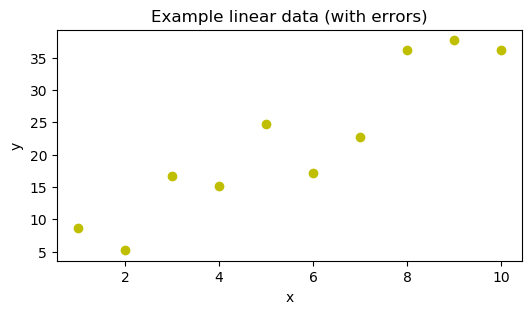

In [161]:
plt.rcParams["figure.figsize"] = (6,3)
plt.figure()
plt.plot(x,y,"yo")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Example linear data (with errors)")
plt.show()

Let's do the linear fit again (with error bars calculated):

Linear np.polyfit of y = m*x + c:
Gradient  m = 3.56 +/- 0.50
Intercept c = 2.47 +/- 3.13


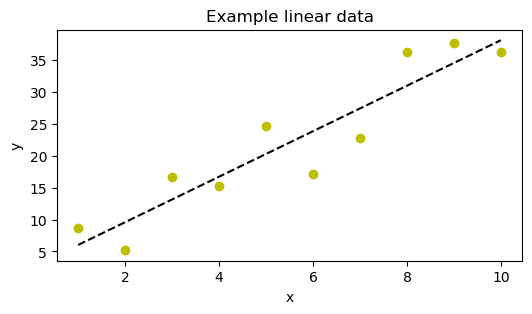

In [162]:
# Perform a linear fit and get the errors
#
# We have to assign weights to the data points to get the correct errors on the fit.
# We assign an error y_sigma = 4.4, which is chosen because the rms deviation from
# dev_vals is 4.4
y_sigma = 4.4
y_weights = (1/y_sigma)*np.ones(np.size(y))
# Now we can do the fit, using y_weights as our list of weights
fit_parameters, fit_errors = np.polyfit(x,y,1,cov=True,w=y_weights)
fit_m = fit_parameters[0]
fit_c = fit_parameters[1]
sigma_m = np.sqrt(fit_errors[0][0])
sigma_c = np.sqrt(fit_errors[1][1])
print('Linear np.polyfit of y = m*x + c:')
print('Gradient  m = {:04.2f} +/- {:04.2f}'.format(fit_m,sigma_m))
print('Intercept c = {:04.2f} +/- {:04.2f}'.format(fit_c,sigma_c))
# Plot the data and the fit
plt.rcParams["figure.figsize"] = (6,3)
plt.figure()
plt.plot(x, y, 'yo', x, fit_m*x+fit_c, '--k')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Example linear data")
plt.show()

A nice feature of polyfit is that we can very easily do a residual plot. Recall that a residual plot is where we compare the best fitted values to the original data values. Let's (rather laboriously) write out explicitly what we are calculating and plotting:

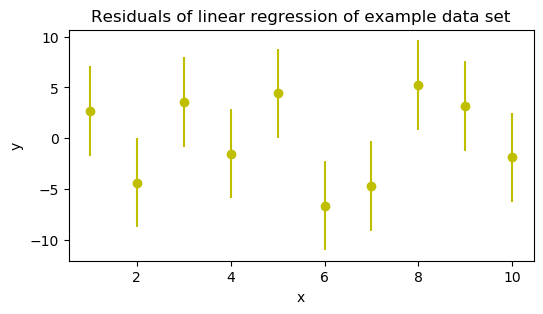

In [163]:
# Assign error bar
y_sigma = 4.4
# Create array of weights (1/sigma) for y values, with same size as data array y
y_weights = (1/y_sigma)*np.ones(np.size(y))
# Create array of error values for the error bar plot below; each element is y_sigma
y_errors = y_sigma*np.ones(np.size(y))
# Perform fit using np.polyfit
fit_parameters, fit_errors = np.polyfit(x,y,1,cov=True,w=y_weights)
# Create set of fitted y values using fit parameters from np.polyfit, and original x values
y_fitted = np.polyval(fit_parameters,x)
# Make plot of the residuals, using the 'errorbar' plotting 
plt.rcParams["figure.figsize"] = (6,3)
plt.figure()
plt.errorbar(x, y-y_fitted,yerr=y_errors, fmt='oy')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Residuals of linear regression of example data set")
plt.show()

Really, we should plot our original data with error bars as well. While we do that, let's also put two plots together:

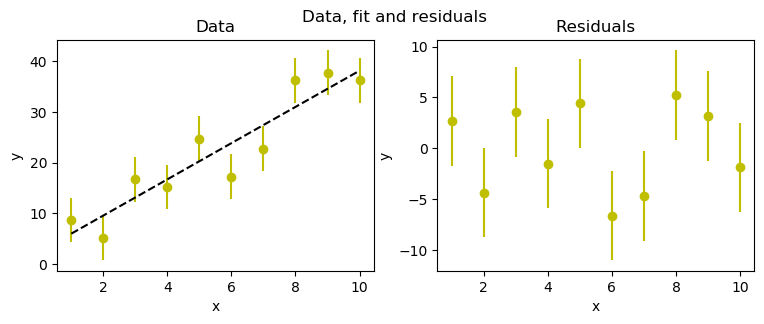

In [164]:
# Assign error bar for all y data
y_sigma = 4.4
# Create array of weights (1/sigma) for y values, with same size as data array y
y_weights = (1/y_sigma)*np.ones(np.size(y))
# Create array of error values for the error bar plot below; each element is y_sigma
y_errors = y_sigma*np.ones(np.size(y))
# Perform fit using np.polyfit
fit_parameters, fit_errors = np.polyfit(x,y,1,cov=True,w=y_weights)
# Create set of fitted y values using fit parameters from np.polyfit, and original x values
y_fitted = np.polyval(fit_parameters,x)
# Make plot of the residuals, using the 'errorbar' command 
plt.rcParams["figure.figsize"] = (9,3)
fig,(ax1,ax2) = plt.subplots(1,2)
fig.suptitle('Data, fit and residuals')
# Plot the data with error bars
ax1.errorbar(x, y,yerr=y_errors, fmt='oy')
ax1.set(xlabel="x")
ax1.set(ylabel="y")
ax1.set_title('Data')
# Add the fitted line
ax1.errorbar(x, y_fitted, fmt='--k')
# On the other plot, plot the residuals
ax2.errorbar(x, y-y_fitted,yerr=y_errors, fmt='oy')
ax2.set(xlabel="x")
ax2.set(ylabel="y")
ax2.set_title('Residuals')
plt.show()

np.polyfit gives us some error bars. But are they correct? Let's check by using our basic knowledge of linear regression (for example, by following Roger Barlow's excellent Statistics book):

Linear regression of y = m*x + c using formulae directly:
Gradient  m = 3.56 +/- 0.48
Intercept c = 2.47 +/- 3.01


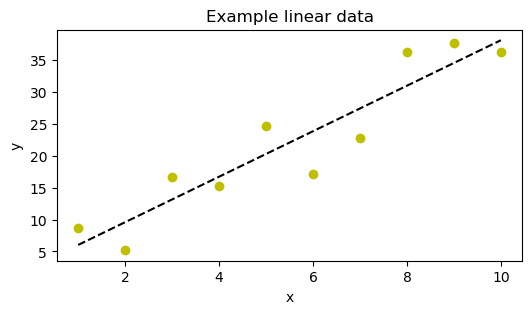

In [165]:
# Perform a linear regression on a data set of x and y values
# These formulae are copied line-by-line from Roger Barlow 'Statistics', Wiley 1989, page 100
# 
# We first define how big the error on the y values are (assuming they are all the same)
y_sigma = 4.4
# We then implement the linear regression calculations, following Barlow
# N_data is N, the number of data points
N_data = np.size(x)
# xbar is the mean of the x values
xbar = np.mean(x)
# ybar is the mean of the x values
ybar = np.mean(y)
# xybar is the mean of x*y values
xybar = np.mean(x*y)
# xbar_sq is the the square of the mean of the x values
xbar_sq = xbar**2
# xsq_bar is the mean of the x^2 values
xsq_bar = np.mean(x**2)
# Calculate the best-fit parameters
fit_m_linreg = (xybar-xbar*ybar)/(xsq_bar-xbar_sq)
fit_c_linreg = ybar - fit_m_linreg*xbar
# Excplicitly calculate the variances
variance_m = y_sigma**2/(N_data*(xsq_bar-xbar_sq)) 
variance_c = (y_sigma**2*xsq_bar)/(N_data*(xsq_bar-xbar_sq))
# The standard deviation (error) of the fit parameters is just the square root
# of the variances
sigma_m = np.sqrt(variance_m)
sigma_c = np.sqrt(variance_c)
# Summarise and print the results
print('Linear regression of y = m*x + c using formulae directly:')
print('Gradient  m = {:04.2f} +/- {:04.2f}'.format(fit_m_linreg,sigma_m))
print('Intercept c = {:04.2f} +/- {:04.2f}'.format(fit_c_linreg,sigma_c))
# Notice the that the fitted m and c values are identical. The error bars are similar, 
# but not quite the same as those from np.polyfit. Can you see where the error is?
#
# Plot the data and the fit
plt.rcParams["figure.figsize"] = (6,3)
plt.figure()
plt.plot(x, y, 'yo', x, fit_m_linreg*x+fit_c_linreg, '--k')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Example linear data")
plt.show()

There are other libraries available in Python that will also do linear regression. Here is an example using the scipy stats package:

Linear regression of y = m*x + c using scipy.stats.linregress:
Gradient  m = 3.56 +/- 0.50
Intercept c = 2.47 +/- no error


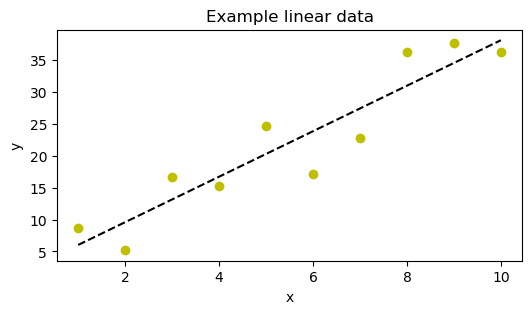

In [166]:
# Perform a linear regression on a data set of x and y values
# using scipy stats.linregress
#
# First, we import the package
from scipy import stats
# Calculate the best-fit parameters using the linregress command
# Notice that the linregress comman doesn't have an obvious way to return the error
# on the intercept
fit_m_stats,fit_c_stats, fit_r_value, fit_p_value, sigma_m_stats = stats.linregress(x,y)
# Summarise and print the results
print('Linear regression of y = m*x + c using scipy.stats.linregress:')
print('Gradient  m = {:04.2f} +/- {:04.2f}'.format(fit_m_stats,sigma_m_stats))
print('Intercept c = {:04.2f} +/- no error'.format(fit_c_stats))
# Notice the that the fitted m and c values are identical to polyfit.
# The error bars on the gradient m is the same as in np.polyfit.
#
# Plot the data and the fit
plt.rcParams["figure.figsize"] = (6,3)
plt.figure()
plt.plot(x, y, 'yo', x, fit_m_stats*x+fit_c_stats, '--k')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Example linear data")
plt.show()

Another popular way to do a linear fit is by using the scipy.optimize.curve_fit package:

Linear regression of y = m*x + c using scipy.optimize.curve_fit:
Gradient  m = 3.56 +/- 0.50
Intercept c = 2.47 +/- 3.13


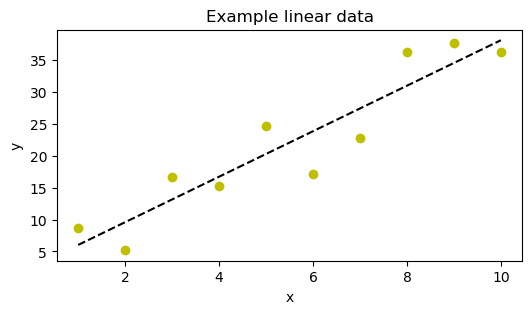

In [167]:
# Perform a linear fit on a data set of x and y values
# using scipy stats.optimize.curve_fit
#
# First, we import the package
from scipy.optimize import curve_fit as cf
# Calculate the best-fit parameters using the curve_fit command
# Here, we have to tell curve_fit what the function looks like, so first we define a function
# on the x variables
def fitfunc(x,m,c):
    return m*x + c
# Assign error bar
y_sigma = 4.4
# Create array of weights (1/sigma) for y values, with same size as data array y
y_weights = (1/y_sigma)*np.ones(np.size(y))
# Create array of error values for the error bar plot below; each element is y_sigma
y_errors = y_sigma*np.ones(np.size(y))
# Calculate the fit
popt, pcov = cf(fitfunc,x,y,sigma = 1/y_errors)
# The fit parameters are returned in popt (the optimized parameters from curve_fit)
fit_m_cf = popt[0]
fit_c_cf = popt[1]
# The errors are returned in pcov (the covariance matrix from curve_fit)
sigma_m_cf = np.sqrt(pcov[0][0])
sigma_c_cf = np.sqrt(pcov[1][1])
# Summarise and print the results
print('Linear regression of y = m*x + c using scipy.optimize.curve_fit:')
print('Gradient  m = {:04.2f} +/- {:04.2f}'.format(fit_m_cf,sigma_m_cf))
print('Intercept c = {:04.2f} +/- {:04.2f}'.format(fit_c_cf,sigma_c_cf))
# Notice the that the fitted m and c values are bascially identical to polyfit,
# and so are the error bars.
#
# Plot the data and the fit
plt.rcParams["figure.figsize"] = (6,3)
plt.figure()
plt.plot(x, y, 'yo', x, fit_m_stats*x+fit_c_stats, '--k')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Example linear data")
plt.show()

![](./img/bee.png)
## Fitting A Quadratic To Some Data

Now we turn our attention to fitting quadratic data. From our above discussion it looks like both np.polyfit and scipy.optimize.curve_fit should give equivalent results. Let's check if that is true.

Quadratic np.polyfit of y = a*x**2 + b*c + c
Quadratic term  a = 3.0079545455 +/- 0.0211132319
Linear term     b = 0.9185606061 +/- 0.2383084447
Intercept       c = 1.5016666667 +/- 0.5706043795


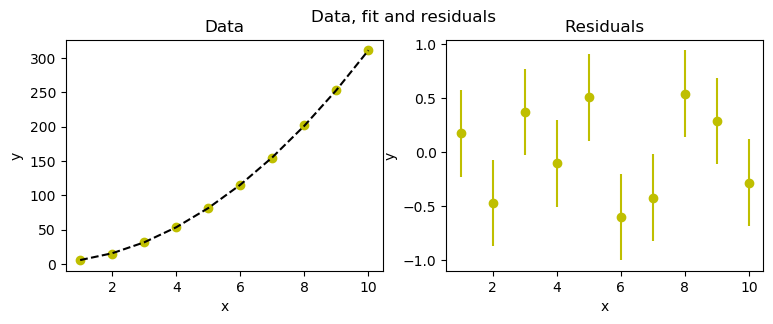

In [156]:
# Generate a set of 
# x values
x = np.array([1., 2, 3, 4, 5, 6, 7, 8, 9, 10])
# a, b, c coefficients
a = 3
b = 1
c = 1.2
# Deviations
dev_vals = np.array([0.4, -0.3, 0.5, 0.0, 0.6, -0.5, -0.3, 0.7, 0.5, 0.0])
# y values generated from x values
y = a*(x**2) + b*x + c + dev_vals
# Assign error bar size
y_sigma = 0.4
# Create array of weights (1/sigma) for y values, with same size as data array y
y_weights = (1/y_sigma)*np.ones(np.size(y))
# Create array of error values for the error bar plot below; each element is y_sigma
y_errors = y_sigma*np.ones(np.size(y))
# The best fit parameters should be approximately a = 3, b = 1, c = 1.2
# Use np.polyfit to find the fit parameters
fit_parameters, fit_errors = np.polyfit(x,y,2,cov=True,w=y_weights)
fit_a = fit_parameters[0]
fit_b = fit_parameters[1]
fit_c = fit_parameters[2]
# Create set of fitted y values using fit parameters from np.polyfit, and original x values
y_fitted = np.polyval(fit_parameters,x)
# Calculate the fit errors from the 
variance_a = fit_errors[0][0]
variance_b = fit_errors[1][1]
variance_c = fit_errors[2][2]
sigma_a = np.sqrt(variance_a)
sigma_b = np.sqrt(variance_b)
sigma_c = np.sqrt(variance_c)
print('Quadratic np.polyfit of y = a*x**2 + b*c + c')
print('Quadratic term  a = {:04.10f} +/- {:04.10f}'.format(fit_a,sigma_a))
print('Linear term     b = {:04.10f} +/- {:04.10f}'.format(fit_b,sigma_b))
print('Intercept       c = {:04.10f} +/- {:04.10f}'.format(fit_c,sigma_c))
# Make plot of the residuals, using the 'errorbar' command 
plt.rcParams["figure.figsize"] = (9,3)
fig,(ax1,ax2) = plt.subplots(1,2)
fig.suptitle('Data, fit and residuals')
# Plot the data with error bars
ax1.errorbar(x, y,yerr=y_errors, fmt='oy')
ax1.set(xlabel="x")
ax1.set(ylabel="y")
ax1.set_title('Data')
# Add the fitted line
ax1.errorbar(x, y_fitted, fmt='--k')
# On the other plot, plot the residuals
ax2.errorbar(x, y-y_fitted,yerr=y_errors, fmt='oy')
ax2.set(xlabel="x")
ax2.set(ylabel="y")
ax2.set_title('Residuals')
plt.show()

Let's do the same procedure, but using scipy.optimize.curve_fit.

(Be careful when comparing this example with the previous one, as some of the variables have been named a little differently to each other)

Quadratic fit of y = a*x**2 + b*c + c using scipy.optimize.curve_fit:
Quadratic term  a = 3.0079545344 +/- 0.0211132283
Linear term     b = 0.9185607346 +/- 0.2383084048
Intercept       c = 1.5016663836 +/- 0.5706043055


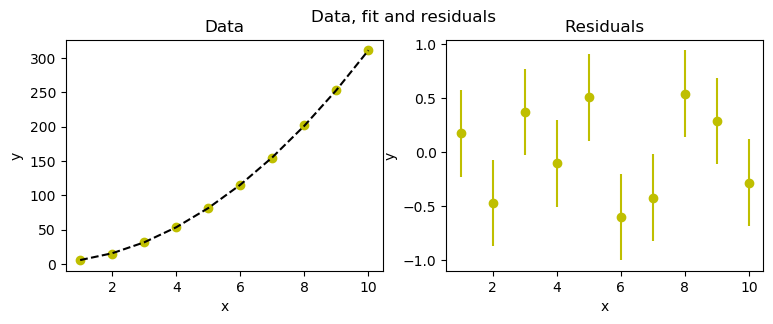

In [176]:
# Perform a quadratic fit on a data set of x and y values
# using scipy stats.optimize.curve_fit
#
# First, we import the package (in case we forgot to run the command earlier)
from scipy.optimize import curve_fit as cf
# Calculate the best-fit parameters using the curve_fit command
# Here, we have to tell curve_fit what the function looks like, so first we define a function
# on the x variables
def fitfunc(x,a,b,c):
    return a*(x**2) + b*x + c
# Generate a set of 
# x values
x = np.array([1., 2, 3, 4, 5, 6, 7, 8, 9, 10])
# a, b, c coefficients
a = 3
b = 1
c = 1.2
# Deviations
dev_vals = np.array([0.4, -0.3, 0.5, 0.0, 0.6, -0.5, -0.3, 0.7, 0.5, 0.0])
# y values generated from x values
y = a*(x**2) + b*x + c + dev_vals
# Assign error bar size
y_sigma = 0.4
# Create array of weights (1/sigma) for y values, with same size as data array y
y_weights = (1/y_sigma)*np.ones(np.size(y))
# Create array of error values for the error bar plot below; each element is y_sigma
y_errors = y_sigma*np.ones(np.size(y))
# Calculate the fit
popt, pcov = cf(fitfunc,x,y,sigma = 1/y_errors)
# The fit parameters are returned in popt (the optimized parameters from curve_fit)
fit_a_cf = popt[0]
fit_b_cf = popt[1]
fit_c_cf = popt[2]
# Create set of fitted y values using fit parameters from np.polyfit, and original x values
y_fitted = np.polyval(popt,x)
# The errors are returned in pcov (the covariance matrix from curve_fit)
sigma_a_cf = np.sqrt(pcov[0][0])
sigma_b_cf = np.sqrt(pcov[1][1])
sigma_c_cf = np.sqrt(pcov[2][2])
# Summarise and print the results
print('Quadratic fit of y = a*x**2 + b*c + c using scipy.optimize.curve_fit:')
print('Quadratic term  a = {:04.10f} +/- {:04.10f}'.format(fit_a_cf,sigma_a_cf))
print('Linear term     b = {:04.10f} +/- {:04.10f}'.format(fit_b_cf,sigma_b_cf))
print('Intercept       c = {:04.10f} +/- {:04.10f}'.format(fit_c_cf,sigma_c_cf))
# Notice the that the fitted a, b and c values are bascially identical to polyfit,
# and so are the error bars.
#
# Make plot of the residuals, using the 'errorbar' command 
plt.rcParams["figure.figsize"] = (9,3)
fig,(ax1,ax2) = plt.subplots(1,2)
fig.suptitle('Data, fit and residuals')
# Plot the data with error bars
ax1.errorbar(x, y,yerr=y_errors, fmt='oy')
ax1.set(xlabel="x")
ax1.set(ylabel="y")
ax1.set_title('Data')
# Add the fitted line
ax1.errorbar(x, y_fitted, fmt='--k')
# On the other plot, plot the residuals
ax2.errorbar(x, y-y_fitted,yerr=y_errors, fmt='oy')
ax2.set(xlabel="x")
ax2.set(ylabel="y")
ax2.set_title('Residuals')
plt.show()

The conclusion we can draw is that quadratic fits in np.polyfit and scipy.optimize.curve_fit basically give the same answer.

![](./img/bee.png)
## Fitting A Line To A Small Number of Data Points

Let's do a fit similar to the (linear) water fit we are doing in Project 1 (4 data points):

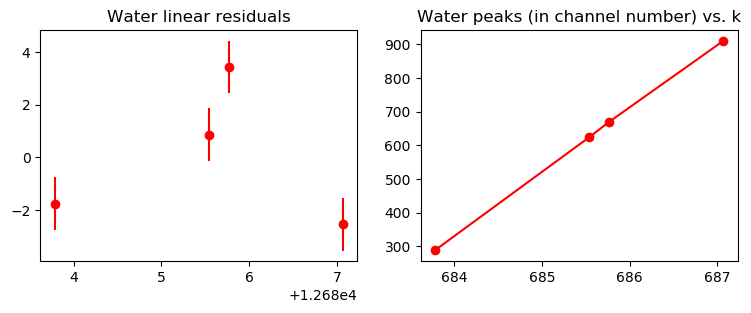

Linear fit of y = m*c + c using np.polyfit of the fake water data:
Linear term     m = 189.6411 +/- 1.4178
Intercept       c = -2405076.2071 +/- 17985.5905


In [14]:
# Define the k values
kvalues=np.array([12683.782,12685.540,12685.769,12687.066])
# Make some 'fake' water peak positions (which I got by eye from the data, 
# and which are most certainly wrong!)
waterpeaks = np.array([288, 624, 670, 910])
# Make an array of error bars
# I assigned +/- 1 channel to the peak position, which seems unlikely to be correct!
watererrorval = 1 
# Make an array of the error bars
watererrors = watererrorval*np.ones(np.size(kvalues))
waterweights = (1/watererrorval)*np.ones(np.size(kvalues))
# Do a linear fit. 
# Notice that I am being inconsistent with my variable naming - I'm sure you can do better
water_fit_params, water_fit_covm = np.polyfit(kvalues,waterpeaks,1,cov=True,w=waterweights)
# Make some fitted points for each fit
waterpeaks_fitted = np.polyval(water_fit_params, kvalues)
# Plot the data
plt.rcParams["figure.figsize"] = (9,3)
fig,(ax1,ax2) = plt.subplots(1,2)
# Plot the residuals
ax1.errorbar(kvalues,waterpeaks-waterpeaks_fitted,watererrors,fmt='or')
ax1.set_title('Water linear residuals')
# Here I subtract 12000 from the k value, to make the x axis look a bit neater
ax2.errorbar(kvalues-12000,waterpeaks,watererrors,fmt='-or')
ax2.set_title('Water peaks (in channel number) vs. k')
plt.show()
# We need to quantify this with a chi-square calculation (an exercise for you)
#
# Assuming that the chi-squared calculation shows that the quadratic fit is appropriate, 
# we can then obtain the errors from the quadratic fit we already did
# The *quadratic* fit parameters are returned in pe2
fit_m = water_fit_params[0]
fit_c = water_fit_params[1]
# The errors are returned in se2 (the covariance matrix from np.polyfit)
sigma_m = np.sqrt(water_fit_covm[0][0])
sigma_c = np.sqrt(water_fit_covm[1][1])
# Summarise and print the results
print('Linear fit of y = m*c + c using np.polyfit of the fake water data:')
print('Linear term     m = {:04.4f} +/- {:04.4f}'.format(fit_m,sigma_m))
print('Intercept       c = {:04.4f} +/- {:04.4f}'.format(fit_c,sigma_c))
# We can then use these parameters to obtain F

![](./img/bee.png)
## Fitting A Quadratic To A Small Number of Data Points

Let's do a fit similar to the (quadratic) Ethyne fit we are doing in Project 1 (5 data points):

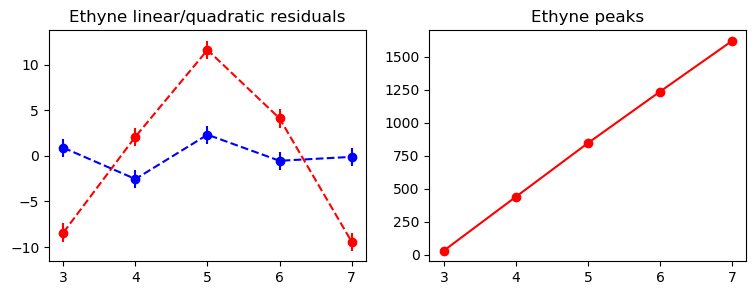

Quadratic fit of y = a*x**2 + b*c + c using np.polyfit of the fake Ethyne data:
Quadratic term  a = -4.6429 +/- 0.6791
Linear term     b = 443.9286 +/- 6.8387
Intercept       c = -1260.8857 +/- 16.1686


In [197]:
# Define the m values
mvalues = np.array([3,4,5,6,7])
# Make some 'fake' Ethyne peak positions (which I got by eye from the data, 
# and which are most certainly wrong!)
ethynepeakpos = np.array([30, 438, 845, 1235, 1619])
# Make an array of error bars
# I assigned +/- 1 channel to the peak position, which seems unlikely to be correct!
peakethyneerrorval = 1 
# Make an array of the error bars
peakethyneerrors = peakethyneerrorval*np.ones(np.size(mvalues))
peakethyneweights = (1/peakethyneerrorval)*np.ones(np.size(mvalues))
# Do both the linear and quadratic fits - oops, I left out the error bar definition here!
pe1, se1 = np.polyfit(mvalues,ethynepeakpos,1,cov=True,w=peakethyneweights)
pe2, se2 = np.polyfit(mvalues,ethynepeakpos,2,cov=True,w=peakethyneweights)
# Make some fitted points for each fit
efitted1 = np.polyval(pe1, mvalues)
efitted2 = np.polyval(pe2, mvalues)
# Plot the data
plt.rcParams["figure.figsize"] = (9,3)
fig,(ax1,ax2) = plt.subplots(1,2)
# Plot the two sets of residuals - we see that the quadratic fit (blue)
# is better than the linear fit (red)
ax1.errorbar(mvalues,ethynepeakpos-efitted1,peakethyneerrors,fmt='--or')
ax1.errorbar(mvalues,ethynepeakpos-efitted2,peakethyneerrors,fmt='--ob')
ax1.set_title('Ethyne linear/quadratic residuals')
ax2.errorbar(mvalues,ethynepeakpos,peakethyneerrors,fmt='-or')
ax2.set_title('Ethyne peaks (in channel number) vs. m')
plt.show()
# We need to quantify this with a chi-square calculation (an exercise for you)
#
# Assuming that the chi-squared calculation shows that the quadratic fit is appropriate, 
# we can then obtain the errors from the quadratic fit we already did
# The *quadratic* fit parameters are returned in pe2
fit_a = pe2[0]
fit_b = pe2[1]
fit_c = pe2[2]
# The errors are returned in se2 (the covariance matrix from np.polyfit)
sigma_a = np.sqrt(se2[0][0])
sigma_b = np.sqrt(se2[1][1])
sigma_c = np.sqrt(se2[2][2])
# Summarise and print the results
print('Quadratic fit of y = a*x**2 + b*c + c using np.polyfit of the fake Ethyne data:')
print('Quadratic term  a = {:04.4f} +/- {:04.4f}'.format(fit_a,sigma_a))
print('Linear term     b = {:04.4f} +/- {:04.4f}'.format(fit_b,sigma_b))
print('Intercept       c = {:04.4f} +/- {:04.4f}'.format(fit_c,sigma_c))
# We can then use these parameters and the other formulae to obtain I0 and I1

You may wonder if it's possible to get anything using only 4, or even 3, data points. Let's try that:

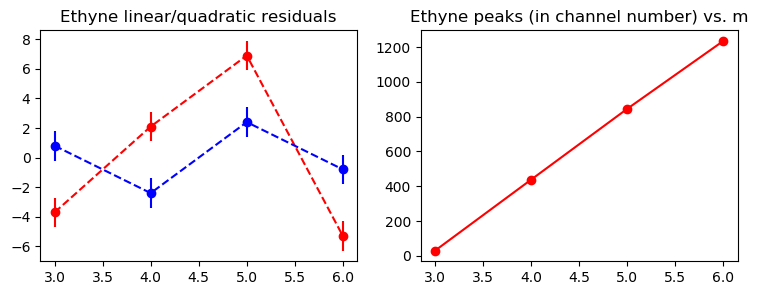

Quadratic fit of y = a*x**2 + b*c + c using np.polyfit of the fake Ethyne data:
Quadratic term  a = -4.5000 +/- 1.7889
Linear term     b = 442.7000 +/- 16.1790
Intercept       c = -1258.4000 +/- 34.7885


In [199]:
# Define the m values - here only 4 data points!
mvalues = np.array([3,4,5,6])
# Make some 'fake' Ethyne peak positions (which I got by eye from the data, 
# and which are most certainly wrong!)
ethynepeakpos = np.array([30, 438, 845, 1235])
# Make an array of error bars
# I assigned +/- 1 channel to the peak position, which seems unlikely to be correct!
peakethyneerrorval = 1 
# Make an array of the error bars
peakethyneerrors = peakethyneerrorval*np.ones(np.size(mvalues))
peakethyneweights = (1/peakethyneerrorval)*np.ones(np.size(mvalues))
# Do both the linear and quadratic fits - oops, I left out the error bar definition here!
pe1, se1 = np.polyfit(mvalues,ethynepeakpos,1,cov=True,w=peakethyneweights)
pe2, se2 = np.polyfit(mvalues,ethynepeakpos,2,cov=True,w=peakethyneweights)
# Make some fitted points for each fit
efitted1 = np.polyval(pe1, mvalues)
efitted2 = np.polyval(pe2, mvalues)
# Plot the data
plt.rcParams["figure.figsize"] = (9,3)
fig,(ax1,ax2) = plt.subplots(1,2)
# Plot the two sets of residuals - we see that the quadratic fit (blue)
# is better than the linear fit (red)
ax1.errorbar(mvalues,ethynepeakpos-efitted1,peakethyneerrors,fmt='--or')
ax1.errorbar(mvalues,ethynepeakpos-efitted2,peakethyneerrors,fmt='--ob')
ax1.set_title('Ethyne linear/quadratic residuals')
ax2.errorbar(mvalues,ethynepeakpos,peakethyneerrors,fmt='-or')
ax2.set_title('Ethyne peaks (in channel number) vs. m')
plt.show()
# We need to quantify this with a chi-square calculation (an exercise for you)
#
# Assuming that the chi-squared calculation shows that the quadratic fit is appropriate, 
# we can then obtain the errors from the quadratic fit we already did
# The *quadratic* fit parameters are returned in pe2
fit_a = pe2[0]
fit_b = pe2[1]
fit_c = pe2[2]
# The errors are returned in se2 (the covariance matrix from np.polyfit)
sigma_a = np.sqrt(se2[0][0])
sigma_b = np.sqrt(se2[1][1])
sigma_c = np.sqrt(se2[2][2])
# Summarise and print the results
print('Quadratic fit of y = a*x**2 + b*c + c using np.polyfit of the fake Ethyne data:')
print('Quadratic term  a = {:04.4f} +/- {:04.4f}'.format(fit_a,sigma_a))
print('Linear term     b = {:04.4f} +/- {:04.4f}'.format(fit_b,sigma_b))
print('Intercept       c = {:04.4f} +/- {:04.4f}'.format(fit_c,sigma_c))
# We can then use these parameters and the other formulae to obtain I0 and I1

In [200]:
# Define the m values - here only 3 data points!
mvalues = np.array([3,4,5])
# Make some 'fake' Ethyne peak positions (which I got by eye from the data, 
# and which are most certainly wrong!)
ethynepeakpos = np.array([30, 438, 845])
# Make an array of error bars
# I assigned +/- 1 channel to the peak position, which seems unlikely to be correct!
peakethyneerrorval = 1 
# Make an array of the error bars
peakethyneerrors = peakethyneerrorval*np.ones(np.size(mvalues))
peakethyneweights = (1/peakethyneerrorval)*np.ones(np.size(mvalues))
# Do both the linear and quadratic fits - oops, I left out the error bar definition here!
pe1, se1 = np.polyfit(mvalues,ethynepeakpos,1,cov=True,w=peakethyneweights)
pe2, se2 = np.polyfit(mvalues,ethynepeakpos,2,cov=True,w=peakethyneweights)
# Make some fitted points for each fit
efitted1 = np.polyval(pe1, mvalues)
efitted2 = np.polyval(pe2, mvalues)
# Plot the data
plt.rcParams["figure.figsize"] = (9,3)
fig,(ax1,ax2) = plt.subplots(1,2)
# Plot the two sets of residuals - we see that the quadratic fit (blue)
# is better than the linear fit (red)
ax1.errorbar(mvalues,ethynepeakpos-efitted1,peakethyneerrors,fmt='--or')
ax1.errorbar(mvalues,ethynepeakpos-efitted2,peakethyneerrors,fmt='--ob')
ax1.set_title('Ethyne linear/quadratic residuals')
ax2.errorbar(mvalues,ethynepeakpos,peakethyneerrors,fmt='-or')
ax2.set_title('Ethyne peaks (in channel number) vs. m')
plt.show()
# We need to quantify this with a chi-square calculation (an exercise for you)
#
# Assuming that the chi-squared calculation shows that the quadratic fit is appropriate, 
# we can then obtain the errors from the quadratic fit we already did
# The *quadratic* fit parameters are returned in pe2
fit_a = pe2[0]
fit_b = pe2[1]
fit_c = pe2[2]
# The errors are returned in se2 (the covariance matrix from np.polyfit)
sigma_a = np.sqrt(se2[0][0])
sigma_b = np.sqrt(se2[1][1])
sigma_c = np.sqrt(se2[2][2])
# Summarise and print the results
print('Quadratic fit of y = a*x**2 + b*c + c using np.polyfit of the fake Ethyne data:')
print('Quadratic term  a = {:04.4f} +/- {:04.4f}'.format(fit_a,sigma_a))
print('Linear term     b = {:04.4f} +/- {:04.4f}'.format(fit_b,sigma_b))
print('Intercept       c = {:04.4f} +/- {:04.4f}'.format(fit_c,sigma_c))
# We can then use these parameters and the other formulae to obtain I0 and I1

ValueError: the number of data points must exceed order to scale the covariance matrix

We see that we can use 4 data points to get a quadratic fit, but not 3. Since we have 5 data points we should obviously use all 5.